## 深層学習（ディープラーニング）

### 2.1.1 ハイパーパラメータ

深層学習手法を使うと、分類あるいは回帰のアルゴリズムをほとんど自動的に生成できるためとても便利です。
また、ニューラルネットワークモデルはいろいろな場面に適用させることができ汎用的です。

しかし、ネットワークを構成する際に人が調整するべきパラメーターいくつか存在します。
これらは ハイパーパラメータ と呼ばれます。

以下は、chapter1のMNIST分類のコードに少しだけ変更を加え、またいくつかのパラメーターを明示した典型的な深層学習手法のコードです。

以下のコードのどこがハイパーパラメータに相当するのかを見ていきます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
# ハイパーパラメータ：活性化関数
model.add(Activation("sigmoid"))
# ハイパーパラメータ：隠れ層の数、隠れ層のチャンネル数
model.add(Dense(128))
model.add(Activation("sigmoid"))
# ハイパーパラメータ：ドロップアウトする割合（rate）
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

# ハイパーパラメータ：学習率（Ir）
sgd = optimizers.SGD(lr=0.01)

# ハイパーパラメータ：最適化関数（optimizer）
# ハイパーパラメータ：誤差関数（loss）
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# ハイパーパラメータ：バッチサイズ（batch_size）
# ハイパーパラメータ：エポック数（epochs）
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))
# （metricsは評価関数なので、学習自体には関係ありません。評価関数については機械学習概論を参照してください。）


Using TensorFlow backend.
/Users/nagatafutoshi/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


上記のようにハイパーパラメータはたくさんあります。
ハイパーパラメータは自動で変更できないものです。これらを適切に設定しないと正しく学習が行われません。
自分で新しくモデルを作る時には最適なハイパーパラメータを吟味する必要があります。
このchapterではそれぞれのハイパーパラメータの意味を理解し、自分でネットワークを構成、調整ができるようにしていきます。

---
### 2.2.1 ネットワーク構造

ネットワークの構造（隠れ層の数、隠れ像のユニット数）は自由に決めて生成することができます。

一般に、隠れ層やユニット数を多くすると、多彩な関数が表現できるようになります。
しかし、隠れ層が多くなると、入力層に近い重みを適切に更新するのが難しく学習がなかなか進みにくくなったり、
隠れ層のユニット数が多くなると重要性の低い特徴量を抽出してしまい過学習(汎化性能が低くなった状態)をしやすくなるなど、
適切にネットワークの構造を設定する必要があります。

ネットワーク構造は理論で裏付けて定めることが難しく、実際には他の似たような実装例を参考にするなど経験に基づいて決定される傾向があります。

次の3つの中から一番精度の出るモデルを予想し、以下のコードを一部変更してください。

ネットワーク構造、特に隠れ層の構造がモデルの学習に与える影響を確認してください
- A: ユニット数256の全結合隠れ層1つと、ユニット数128の全結合隠れ層1つをもつモデル（ハイパーパラメーターの章のものと同じモデル）
- B: ユニット数256の全結合隠れ層1つと、ユニット数128の全結合隠れ層3つをもつモデル
- C: ユニット数256の全結合隠れ層1つと、ユニット数1568の全結合隠れ層1つをもつモデル

条件は以下のようにします。
コードを二行コメントアウトし、他は変えないでください。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

def funcA():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcB():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcC():
    model.add(Dense(1568))
    model.add(Activation("sigmoid"))

#---------------------------
# funcA()
# funcB()
funcC()
#---------------------------

model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 2s 390us/step - loss: 7.0743 - acc: 0.2638
Epoch 2/3
6000/6000 [==============================] - 2s 279us/step - loss: 5.3619 - acc: 0.4888
Epoch 3/3
6000/6000 [==============================] - 2s 285us/step - loss: 2.1886 - acc: 0.5708
evaluate loss: 0.9813630390167236
evaluate acc: 0.648


#### 結果

- funcA
evaluate loss: 0.7527680978775024
evaluate acc: 0.788

- funcB
evaluate loss: 2.2726922454833987
evaluate acc: 0.277    

- funcC
evaluate loss: 0.9813630390167236
evaluate acc: 0.648

この中では、一番単純なモデルが一番予測精度が高い

---
### 2.3.1 ドロップアウト

ドロップアウト は、 過学習を防ぎモデルの精度をあげるための手法の一つ です。

ドロップアウトを使うと、ユニットの一部が学習のたびにランダムに削除（より正確には0で上書き）されます。
これにより、ニューラルネットは特定のニューロンの存在に依存できなくなり、より 汎用的な（学習データ以外でも通用しやすい）特徴を学習する ようになります。 その結果、学習データに対する過学習を防ぐことができます。

ドロップアウトは以下のようにして使います。

>model.add(Dropout(rate=0.5))

ここでrateは削除するユニットの割合です。

ドロップアウトを使う位置、引数のrateはともにハイパーパラメータです。

#### 課題
ドロップアウトを実装して、訓練データとテストデータそれぞれの正解率が近くなっていることを確認してください。

Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 1s 198us/step - loss: 1.7152 - acc: 0.4172 - val_loss: 1.0969 - val_acc: 0.7450
Epoch 2/5
6000/6000 [==============================] - 1s 133us/step - loss: 1.0401 - acc: 0.6652 - val_loss: 0.8040 - val_acc: 0.7520
Epoch 3/5
6000/6000 [==============================] - 1s 135us/step - loss: 0.8527 - acc: 0.7360 - val_loss: 0.6982 - val_acc: 0.7890
Epoch 4/5
6000/6000 [==============================] - 1s 153us/step - loss: 0.7752 - acc: 0.7553 - val_loss: 0.6546 - val_acc: 0.8000
Epoch 5/5
6000/6000 [==============================] - 1s 150us/step - loss: 0.7413 - acc: 0.7568 - val_loss: 0.6416 - val_acc: 0.8280


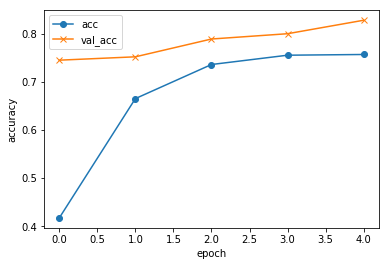

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))

#---------------------------
model.add(Dropout(rate=0.5))
#---------------------------

model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 1s 249us/step - loss: 1.3591 - acc: 0.6397 - val_loss: 0.8677 - val_acc: 0.7570
Epoch 2/5
6000/6000 [==============================] - 1s 136us/step - loss: 0.7055 - acc: 0.8338 - val_loss: 0.7223 - val_acc: 0.7650
Epoch 3/5
6000/6000 [==============================] - 1s 139us/step - loss: 0.5788 - acc: 0.8557 - val_loss: 0.6303 - val_acc: 0.8260
Epoch 4/5
6000/6000 [==============================] - 1s 137us/step - loss: 0.5491 - acc: 0.8628 - val_loss: 0.5877 - val_acc: 0.8460
Epoch 5/5
6000/6000 [==============================] - 1s 131us/step - loss: 0.4888 - acc: 0.8725 - val_loss: 0.6394 - val_acc: 0.8070


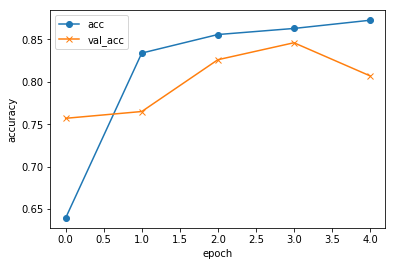

In [17]:
# Dropout の値を変更して結果がどう変わるか検証する
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))

#---------------------------
model.add(Dropout(rate=0.0001))
#---------------------------

model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

### 2.4.1 活性化関数

活性化関数 とは、主に全結合層の後に適用する関数で、もともとニューロンの発火に相当していたものです。

全結合層では、入力を線形変換したものを出力しますが、 活性化関数を用いることで非線形性をもたせます 。

活性化関数を使わない場合、以下のような一本の直線で分離できない（線形分離不可能）データは分類できないことが数学的にわかっています。

![線形分離不可能](./dnn_chap2_10.png "dnn_chap2_10")

非線形性をもたせると適切に学習が進めば線形分離不可能なモデルも必ず分類できます。

活性化関数もハイパーパラメータです。
よく使われる活性化関数はいくつかあり、適切に選ぶ必要があります。

---
### 2.4.2 シグモイド関数

活性化関数として用いられる関数の1つに シグモイド関数 というものがあり、この関数は次式で与えられます。

$$
sigmoid(x) = \frac{1}{1+e^{-x}}
$$

![シグモイドとその微分](./dnn_chap2_20.png "dnn_chap2_20")

青いグラフがシグモイド関数で、オレンジ色のグラフがシグモイド関数の導関数です。




### 2.4.3 ReLU

もうひとつ活性化関数によく用いられる ReLU（ランプ関数） というものについて説明します。
ReLUはRectified Linear Unitの略で次式のような関数です。

$$
\mathrm{ReLU}(x) = \begin{cases} 0 (x<0) \\ x (x\geq 0)\end{cases}
$$

![ランプ関数](./dnn_chap2_30.png "dnn_chap2_30")

青いグラフがReLUで、オレンジ色のグラフがReLUの導関数です。
一般的に、出力が大きい値だと学習速度は早くなります。

---
### 2.5.1 損失関数

学習時に、モデルの出力と教師データとの差（間違え具合）を評価する関数を 損失関数（誤差関数） といいます。

損失関数には 二乗誤差 や クロスエントロピー誤差 などが用いられます。

この損失関数を最小化するように誤差逆伝播法という手法で各層の重みは更新されます。

損失関数としてなぜ正解率を使わないのか疑問に思うかもしれません。
確かに正解率を使うことはできなくはないですが、モデルがどの程度間違えているかやどういう間違え方（どのクラスだと誤認したのか）をしているかなどを総合的に評価するために、二乗誤差やクロスエントロピー誤差を損失関数として使うのが一般的です。

損失関数には様々な種類が存在し、値を最小化するように重みの更新をします。

---
### 2.5.2 二乗誤差
左向き矢印
前へ
次へ
右向き矢印
MENU一覧
二乗誤差 は、最小二乗法として統計学など様々な分野で用いられる誤差関数です。

$$
{E} = \sum_{i=1}^N ({t_i - y_i})^{2}
$$

連続値の評価に優れているため主に回帰モデルの誤差関数 として使われます。上式の
$y_i,  t_i$
はそれぞれ、正解ラベル、予測ラベルを表しています。

回帰に向いており、最小値の付近ではゆっくりと更新が行われるため、学習が収束しやすい特徴があります。

---
### 2.5.3 クロスエントロピー誤差

クロスエントロピー誤差 は、 二値分類の評価に特化しているため、主に分類モデルの誤差関数 として使われます。

$$
E=\sum_{i=1}^N (-t_i\log y_i-(1-t_i)\log (1-y_i))
$$


それでは、この関数がどのような特性をもつのかみていきましょう。

>(i) $t_i << y_i$ のとき $-t_i\log y_i$はほぼ0で、 $-(1-t_i)\log (1-y_i)$ は正の無限大です。

>(ii) $t_it >> y_i$のとき $-t_i\log y_i$ は正の無限大で、 $-(1-t_i)\log (1-y_i)$はほぼ0です。

>(iii) $t_i ≒ y_i$ のとき $-t_i\log y_i-(1-t_i)\log(1-y_i)$ は 0.69... ~ 0 の値を取ることが簡単な計算で求まります。


したがって $-t_i\log y_i-(1-t_i)\log (1-y_i)$ は、$|t_i - y_i|$ が大きいとき極端に大きな値を返し、$|t_i - y_i|$が小さいとき0に近い値をとることがわかります。


分類の学習において、正解ラベル$y_iy$と予測ラベル$t_it$の値は近いほど良いのでこの関数は有用です。

これらのことから、クロスエントロピー誤差は、 **0~1の2つの数の差を評価する上で合理的な関数** であると言えます。

クロスエントロピーは二値分類の評価に特化しており、主に分類モデルの誤差関数として使われます。

---
### 2.6.1 最適化関数

重みの更新は、誤差関数を各重みで微分した値を元に、更新すべき方向とどの程度更新するかを決めます。

微分によって求めた値を、 **学習率、エポック数、過去の重みの更新量など** を踏まえてどのように重みの更新に反映するかを定めるのが **最適化関数** です。

最適化関数は様々な要素を踏まえて重みの更新を行いますが、手法によって重みの更新の仕方が異なり、ハイパーパラメータの一種となっています。

![最適化関数比較](./dnn_chap2_40.gif "dnn_chap2_40")

---
### 2.7.1 学習率

**学習率** とは、 **各層の重みを一度にどの程度変更するかを決めるハイパーパラメーター** です。

以下は、最小化を行おうとしているモデルと、学習率が与える影響を図示したものです。右上の点が初期値です。

![](./dnn_chap2_50.png "dnn_chap2_50")

1. 学習率が低すぎて、ほどんど更新が進んでいません。
2. 適切な学習率のため、少ない回数で値が収束しています。
3. 収束はしますが、値が大きいため、更新の仕方に無駄があります。
4. 学習率が大きすぎて、値が発散してしまっています。（上側に更新されており、値がどんどん大きくなっています。）

このように、 **損失関数に対して適切な学習率を設定する必要** があります。


#### 課題

次の3つの中から一番精度の出る学習率を予想し、以下のコードの一部を変更してください。
学習率がモデルの学習に与える影響を確認してください。

```python
funcA() lr: 0.01
funcB() lr: 0.1
funcC() lr: 1.0
```

コードを二行コメントアウトし、他は変えないでください。

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


def funcA():
    global lr
    lr = 0.01

def funcB():
    global lr
    lr = 0.1

def funcC():
    global lr
    lr = 1.0

# 二つコメントアウトして学習率を決めてください。
#---------------------------
# funcA()
# funcB()
funcC()
#---------------------------

sgd = optimizers.SGD(lr=lr)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 2s 250us/step - loss: 2.1667 - acc: 0.2198
Epoch 2/3
6000/6000 [==============================] - 1s 128us/step - loss: 1.9522 - acc: 0.2830
Epoch 3/3
6000/6000 [==============================] - 1s 132us/step - loss: 1.8940 - acc: 0.3083
evaluate loss: 1.8199505462646484
evaluate acc: 0.303


#### 結果
* funcA()
    * acc: 0.5103
    * evaluate loss: 1.4041293697357178
    * evaluate acc: 0.7
* funcB()
    * acc: 0.7117
    * evaluate loss: 0.7126964087486267
    * evaluate acc: 0.801
* funcC()
    * acc: 0.3083
    * evaluate loss: 1.8199505462646484
    * evaluate acc: 0.303

---
### 2.8.1 ミニバッチ学習

モデルの学習を行う際、一度にモデルに渡す入力データの数は変えることができます。
一度に渡すデータの数を、 **バッチサイズ** といい、これもハイパーパラメータです。

一度に複数のデータを渡した時、モデルはそれぞれのデータでの損失と損失関数の勾配（重みをどのように更新するべきか）を求めますが、
重みの更新は、１回のみ、求めた勾配の平均を使って行われます。

**複数のデータを用いて重みの更新を行うことで、極端に変わったデータの影響をあまり受けずに済み、また並列計算が行えるので計算時間を短縮することができます。**

一方、複数のデータを用いて重みの更新を行うと、極端な重みの更新が発生しなくなり、損失関数の局所解から抜け出せなくなる恐れがあります。

**癖の強いデータが多い時はバッチサイズを大きくする、同じようなデータが多いときはバッチサイズを小さくする** などと、 バッチサイズをうまく調整する必要があります。

バッチサイズを1とする手法を**オンライン学習(確率的勾配法)**

バッチサイズを全データ数とする手法を**バッチ学習（再急降下法）**

これらの中間となる手法を**ミニバッチ学習**と言います。


#### 課題
次の3つの中から一番精度の出るバッチサイズを予想し、以下のコードの一部を変更してください。
バッチサイズがモデルの学習に与える影響を確認してください。

* funcA() batch_size: 16
* funcB() batch_size: 32
* funcC() batch_size: 64

コードを二行コメントアウトし、他は変えないでください。

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# 二つコメントアウトしてbatch_sizeを決めてください。
#---------------------------
# batch_size: 16
# funcA()
# batch_size: 32
# funcB()
#batch_size: 64
funcC()
#---------------------------

model.fit(X_train, y_train, batch_size=batch_size, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 1s 205us/step - loss: 1.8959 - acc: 0.3483
Epoch 2/3
6000/6000 [==============================] - 1s 87us/step - loss: 1.1725 - acc: 0.6507
Epoch 3/3
6000/6000 [==============================] - 1s 90us/step - loss: 0.8625 - acc: 0.7510
evaluate loss: 0.69946275472641
evaluate acc: 0.812


#### 結果
* batch_size: 16
    * funcA()
    * acc: 0.6562
    * evaluate loss: 0.8287952966690063
    * evaluate acc: 0.725
* batch_size: 32
    * funcB()
    * acc: 0.7270
    * evaluate loss: 0.7212926864624023
    * evaluate acc: 0.816
* batch_size: 64
    * funcC()
    * acc: 0.7510
    * evaluate loss: 0.69946275472641
    * evaluate acc: 0.812

---
### 2.9.1 反復学習

一般に、モデルの精度をあげるため同じ訓練データを使って何度か学習させるということを行います。これを **反復学習** といいます。

この学習を行う回数を **エポック数** といい、これもハイパーパラメータです。

エポック数は大きくすればモデルの精度が上がり続ける、というものではありません。
正解率は途中から伸びなくなるだけでなく、繰り返し学習をすることで損失関数を最小化させようとして過学習が起こります。
適切なタイミングで学習を打ち切ることが必要となってきます。

#### 課題
次の3つの中から一番精度の出るエポック数を予想し、以下のコードの一部を変更してください。
エポック数がモデルの学習に与える影響を確認してください。

* funcA() epochs: 5
* funcB() epochs: 10
* funcC() epochs: 60

コードを二行コメントアウトし、他は変えないでください。

Train on 1500 samples, validate on 6000 samples
Epoch 1/5
1500/1500 [==============================] - 1s 855us/step - loss: 2.0300 - acc: 0.3540 - val_loss: 1.7298 - val_acc: 0.5017
Epoch 2/5
1500/1500 [==============================] - 1s 364us/step - loss: 1.4293 - acc: 0.6700 - val_loss: 1.3389 - val_acc: 0.6675
Epoch 3/5
1500/1500 [==============================] - 1s 411us/step - loss: 1.0644 - acc: 0.7707 - val_loss: 1.0368 - val_acc: 0.7078
Epoch 4/5
1500/1500 [==============================] - 1s 353us/step - loss: 0.8629 - acc: 0.8040 - val_loss: 0.9297 - val_acc: 0.7293
Epoch 5/5
1500/1500 [==============================] - 1s 355us/step - loss: 0.7625 - acc: 0.8247 - val_loss: 0.8883 - val_acc: 0.7122


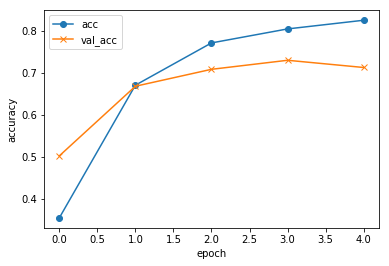

evaluate loss: 0.888334392229716
evaluate acc: 0.7121666666666666


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:1500]
X_test = X_test.reshape(X_test.shape[0], 784)[:6000]
y_train = to_categorical(y_train)[:1500]
y_test = to_categorical(y_test)[:6000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 今回はDropoutを使いません。
#model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global epochs
    epochs = 5

def funcB():
    global epochs
    epochs = 10

def funcC():
    global epochs
    epochs = 60

# 二つコメントアウトしてエポック数を決めてください。
#---------------------------
# epochs: 5
funcA()
# epochs: 10
# funcB()
# epochs: 60
# funcC()
#---------------------------

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

#### 結果
* epochs: 5
    * evaluate loss: 0.8495963827768962
    * evaluate acc: 0.7645
* epochs: 10
    * evaluate loss: 0.6864636475245158
    * evaluate acc: 0.809
* epochs: 60
    * evaluate loss: 0.7611834805806478
    * evaluate acc: 0.7461666666666666